# Course Project Code

### Keiuntae Smith
### DSC630 Predictive Analysis
### 28 July 2022

In [1]:
!pip install termcolor

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import seaborn as sb
from termcolor import colored as cl 

from sklearn.model_selection import train_test_split # used to split data

from sklearn.linear_model import LinearRegression # OLS algorithm
from sklearn.linear_model import Ridge # Ridge algorithm
from sklearn.linear_model import Lasso # Lasso algorithm

#model evaluation metrics
from sklearn.metrics import explained_variance_score as evs 
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error

sb.set_style('whitegrid') 
plt.rcParams['figure.figsize'] = (15, 8) 

In [3]:
# IMPORTING DATA

df = pd.read_csv('House_Data.csv')

df.head()

,Id,LotArea,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,1,8450,196.0,150,856,856,854,1710,548,0,61,208500
1,2,9600,0.0,284,1262,1262,0,1262,460,298,0,181500
2,3,11250,162.0,434,920,920,866,1786,608,0,42,223500
3,4,9550,0.0,540,756,961,756,1717,642,0,35,140000
4,5,14260,350.0,490,1145,1145,1053,2198,836,192,84,250000


In [4]:
df.shape

(1460, 12)

In [5]:
# remove all the null values contained in dataset
df.dropna(inplace=True)

print(cl(df.isnull().sum(), attrs=['bold']))

Id             0
LotArea        0
MasVnrArea     0
BsmtUnfSF      0
TotalBsmtSF    0
1stFlrSF       0
2ndFlrSF       0
GrLivArea      0
GarageArea     0
WoodDeckSF     0
OpenPorchSF    0
SalePrice      0
dtype: int64


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           1452 non-null   int64  
 1   LotArea      1452 non-null   int64  
 2   MasVnrArea   1452 non-null   float64
 3   BsmtUnfSF    1452 non-null   int64  
 4   TotalBsmtSF  1452 non-null   int64  
 5   1stFlrSF     1452 non-null   int64  
 6   2ndFlrSF     1452 non-null   int64  
 7   GrLivArea    1452 non-null   int64  
 8   GarageArea   1452 non-null   int64  
 9   WoodDeckSF   1452 non-null   int64  
 10  OpenPorchSF  1452 non-null   int64  
 11  SalePrice    1452 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 147.5 KB


In [7]:
#set the ID as index
df.set_index('Id', inplace = True)

In [8]:
#convert float values to integer types using the 'astype' function
df['MasVnrArea'] = pd.to_numeric(df['MasVnrArea'], errors = 'coerce')
df['MasVnrArea'] = df['MasVnrArea'].astype('int64')

In [9]:
#recheck variable datatypes 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 1 to 1460
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   LotArea      1452 non-null   int64
 1   MasVnrArea   1452 non-null   int64
 2   BsmtUnfSF    1452 non-null   int64
 3   TotalBsmtSF  1452 non-null   int64
 4   1stFlrSF     1452 non-null   int64
 5   2ndFlrSF     1452 non-null   int64
 6   GrLivArea    1452 non-null   int64
 7   GarageArea   1452 non-null   int64
 8   WoodDeckSF   1452 non-null   int64
 9   OpenPorchSF  1452 non-null   int64
 10  SalePrice    1452 non-null   int64
dtypes: int64(11)
memory usage: 136.1 KB


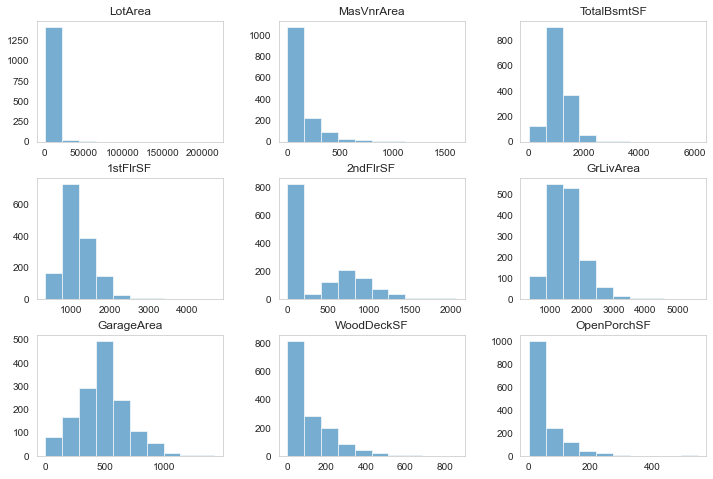

In [10]:
#generate histograms for selected numerical features 
df[['LotArea', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']].hist(figsize=(12, 8), alpha=0.6, grid=False)
plt.show()

Text(0.5, 1.0, 'Heatmap of Housing Attributes')

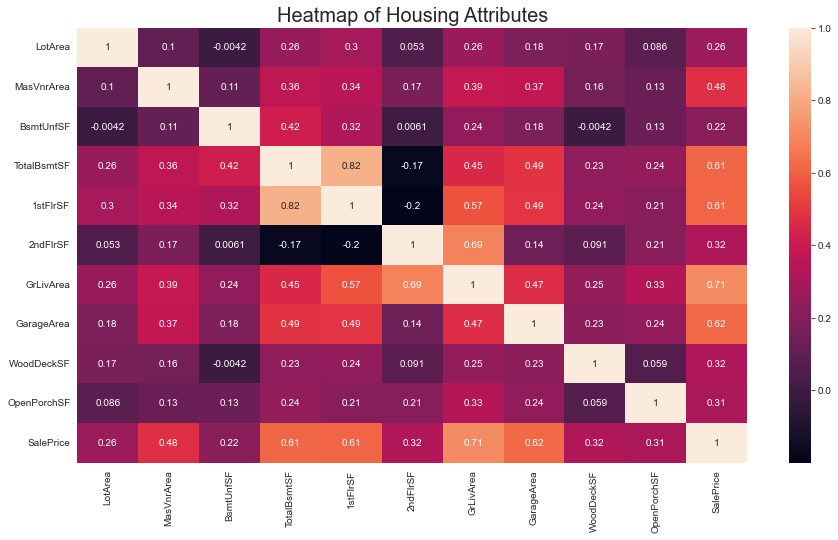

In [11]:
#generate heatmap of dataset to check for correlation
cor = df.corr()
p = sns.heatmap(cor, annot = True)
p.set_title('Heatmap of Housing Attributes', fontsize=20)

/Users/keiuntaesmith/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

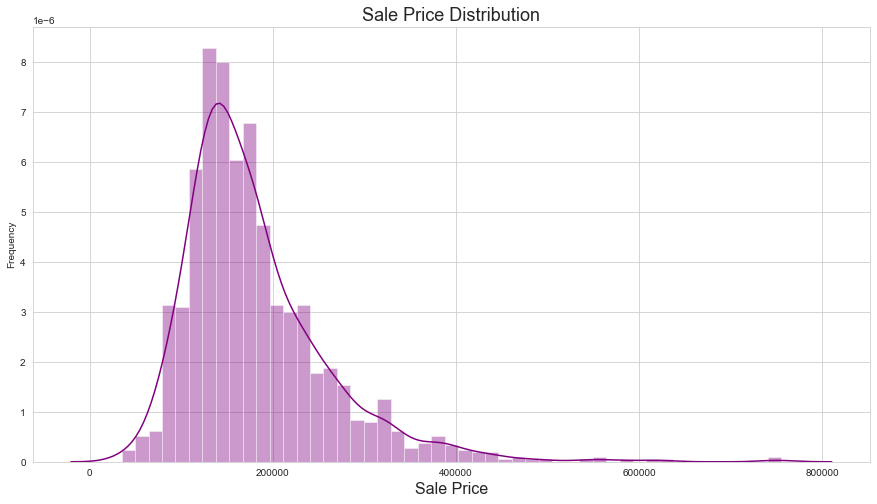

In [12]:
#create a distribution plot of Sale Price
sns.distplot(df.SalePrice, color='purple')
plt.title('Sale Price Distribution', fontsize=18)
plt.xlabel('Sale Price', fontsize=16)
plt.ylabel('Frequency')

## Split the Data into training and test set


In [13]:
# FEATURE SELECTION & DATA SPLIT

X = df[['LotArea', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']].values
y = df['SalePrice'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(cl('X_train samples : ', attrs = ['bold']), X_train[0:5])
print(cl('X_test samples : ', attrs = ['bold']), X_test[0:5])
print(cl('y_train samples : ', attrs = ['bold']), y_train[0:5])
print(cl('y_test samples : ', attrs = ['bold']), y_test[0:5])

X_train samples :  [[ 10200    219    678   1461   1509      0   1509    600    224      0]
 [  9947      0    577   1188   1217      0   1217    497    168     27]
 [  7200      0      0      0   1040      0   1040    625      0      0]
 [215245      0     80   2136   2036      0   2036    513      0      0]
 [  6120      0    952    952   1022    752   1774    468     90      0]]
X_test samples :  [[ 1953   408   174   483   483   504   987   264    72     0]
 [ 4500   116   319  1216  1216     0  1216   402     0   125]
 [10762   344   284   978  1005   978  1983   490     0     0]
 [39104     0    96  1385  1363     0  1363   439    81     0]
 [10005   299   768  1160  1156   866  2022   505   288   117]]
y_train samples :  [175000 173000 109500 375000 129900]
y_test samples :  [ 83000 164000 225000 241500 192000]


## Modeling and Evaluations

### Ordinal Least Square Algorithm (OLS)

In [14]:
# Create and fit Ordinal Least Square algorithm

ols_model = LinearRegression()
ols_model.fit(X_train, y_train)

LinearRegression()

In [15]:
ols_model_pre = ols_model.predict(X_test)

In [16]:
#obtain the coefficient of determination (R2)
print(cl('Coefficient of determination Score of ols_model model: {}'.format(r2(y_test, ols_model_pre)*100), 
         attrs = ['bold']))

Coefficient of determination Score of ols_model model: 77.2383636249033


In [17]:
# Obtain the Explained Variance Score
print(cl('Explained Variance Score of ols_model model: {}'.format(evs(y_test, ols_model_pre)*100), 
         attrs = ['bold']))

Explained Variance Score of ols_model model: 77.33369645921897


### Lasso Regression Model

In [18]:
# Create and fit Lasso Regression algorithm

lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

/Users/keiuntaesmith/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.334e+11, tolerance: 7.239e+08
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [19]:
lasso_model_pre = lasso_model.predict(X_test)

In [20]:
#obtain the coefficient of determination (R2)
print(cl('Coefficient of determination Score of lasso model: {}'.format(r2(y_test, lasso_model_pre)*100), 
         attrs = ['bold']))

Coefficient of determination Score of lasso model: 77.23836623441476


In [21]:
# Obtain the Explained Variance Score
print(cl('Explained Variance Score of Lasso model is {}'.format(evs(y_test, lasso_model_pre)*100), 
         attrs = ['bold']))

Explained Variance Score of Lasso model is 77.33370054270638


### Ridge  Regression Algorithm

In [22]:
# Create and fit Ridge Regression algorithm

ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

Ridge()

In [23]:
ridge_model_pre = ridge_model.predict(X_test)

In [24]:
#obtain the coefficient of determination (R2)
print(cl('Coefficient of determination Score of Ridge model: {}'.format(r2(y_test, ridge_model_pre)*100), 
         attrs = ['bold']))

Coefficient of determination Score of Ridge model: 77.23836360889462


In [25]:
# Obtain the Explained Variance Score
print(cl('Explained Variance Score of Ridge model: {}'.format(evs(y_test, ridge_model_pre)*100), 
         attrs = ['bold']))

Explained Variance Score of Ridge model: 77.33369645976185
